# 🔊 Working with Audio in Python

<img src="https://miro.medium.com/max/1100/1*Zx9QAMPzxhama9O4q9xWXg.jpeg" width="600"/>

This notebook is intended to be an introduction for anyone interested in using python to interperate audio data.

Please watch the youtube video that discusses the contents of this notebook if you want to learn more!
- [Video Link](https://www.youtube.com/watch?v=ZqpSb5p1xQo)
- [Youtube Channel](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw)

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# Terms to know for Audio in Digital Form:

## Frequency (Hz)
- Frequency describes the differences of wave lengths.
- We interperate frequency has high and low pitches.

<img src="https://uploads-cdn.omnicalculator.com/images/britannica-wave-frequency.jpg" width="400"/>

## Intensity (db / power)
- Intensity describes the amplitude (height) of the wave.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780124722804500162-f13-15-9780124722804.gif" width="400"/>

## Sample Rate
- Sample rate is specific to how the computer reads in the audio file.
- Think of it as the "resolution" of the audio.

<img src="https://www.headphonesty.com/wp-content/uploads/2019/07/Sample-Rate-Bit-Depth-and-Bit-Rate.jpeg" width="400"/>


# Reading in Audio Files
There are many types of audio files: `mp3`, `wav`, `m4a`, `flac`, `ogg`

In [3]:
audio_files = glob("sampleaudio.wav")

In [4]:
# Play audio file
ipd.Audio(audio_files[0])

y: [ 6.93716313e-21  1.36454137e-20  1.06263806e-20 -2.76006664e-21
  8.35125262e-22  1.13312556e-21  8.73092287e-21 -9.19656820e-23
 -2.46105468e-22  1.51844980e-20]
shape y: (252429,)
sr: 22050


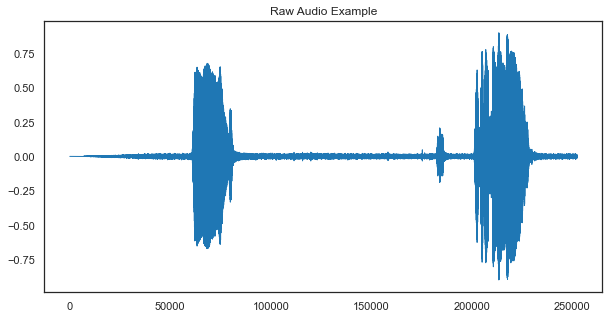

6.937163131873038e-21


In [34]:
y, sr = librosa.load("hoot-46198.mp3", sr=22050)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')
# f = open("hoot-46198.txt", "w")
# f.write(y)
# f.close()
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
y = y.astype(float)
# print(f'shape y: {y.shape}')
y = y.tolist()
print(y[0])
y = ','.join('%.4f' %x for x in y)

f = open("hoot-46198.txt", "w")
f.write(y)
f.close()

In [7]:
y,sr = librosa.load("training/owl/owl-hooting-48028.mp3",sr=22050)
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
ipd.Audio("training/owl/owl-hooting-48028.mp3")

<ipython-input-7-6d92aaf8d974>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y,sr = librosa.load("training/owl/owl-hooting-48028.mp3",sr=22050)


FileNotFoundError: [Errno 2] No such file or directory: 'training/owl/owl-hooting-48028.mp3'

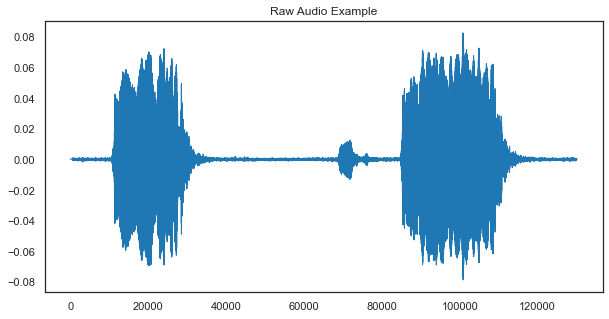

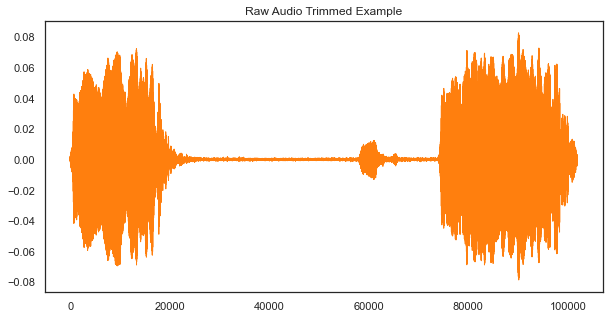

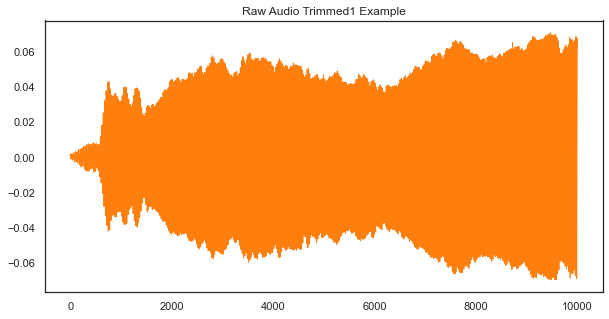

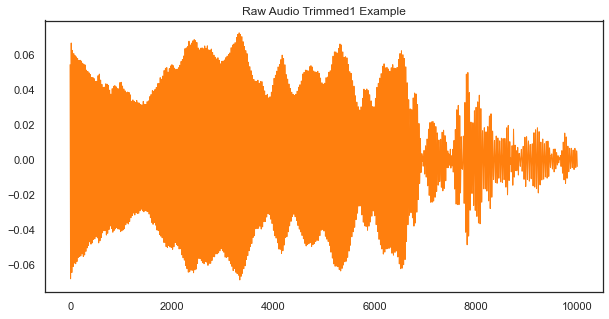

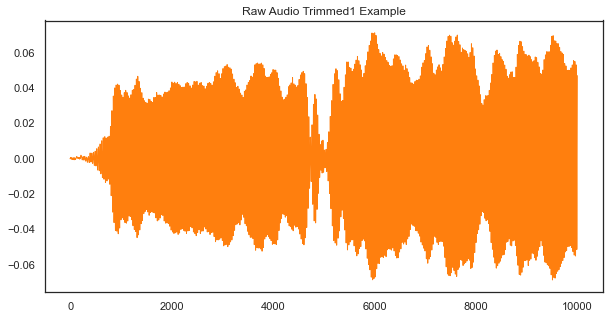

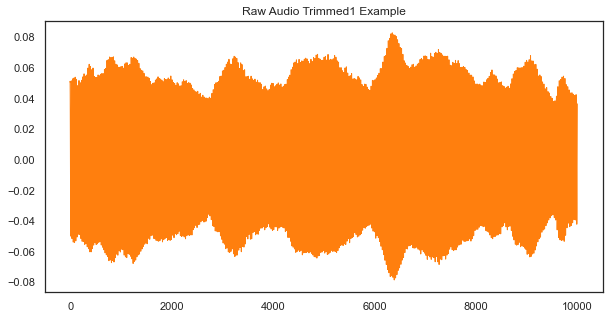

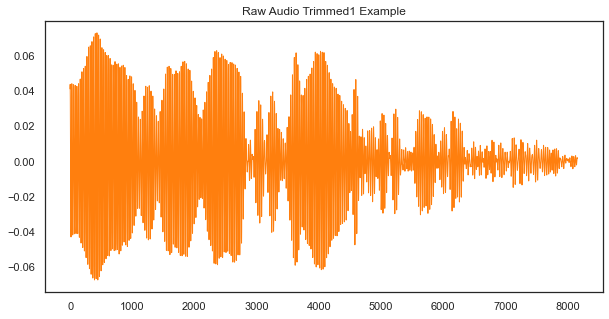

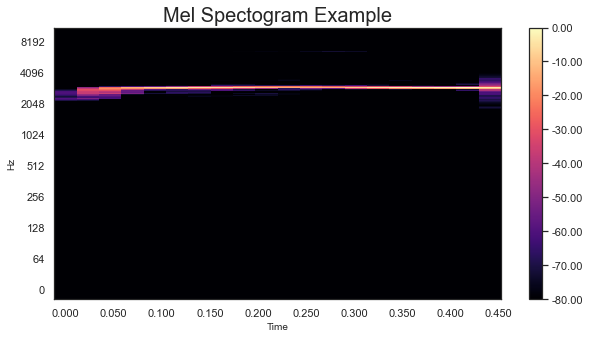

In [4]:
y,sr = librosa.load("training/1owl/owl-hooting-48028.mp3",sr=22050)
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
ipd.Audio("training/1owl/owl-hooting-48028.mp3")
### this code trims and front and back and then puts it into chunks
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()


def cut_song(song, step = 10000):
  song_pieces = []
  
  # for i in range(start, end, step):
  #   song_pieces.append(song[i:i+step])
  y_split = librosa.effects.split(song, top_db=20)
  for i in y_split:
    segment = song[i[0]:i[1]]
    for j in range(0, (len(segment)-int(step/2)), step):

      song_pieces.append(segment[j:j+step])
  return song_pieces
  
# y_split = librosa.effects.split(y, top_db=20)
# print("ysplit", y_split)

# for i in y_split:
#   pd.Series(i).plot(figsize=(10, 5),
#                     lw=1,
#                     title='Raw Audio Trimmed Example',
#                   color=color_pal[1])
yCut = cut_song(y_trimmed, 10000)


for i in yCut:
  pd.Series(i).plot(figsize=(10, 5),
                    lw=1,
                    title='Raw Audio Trimmed1 Example',
                  color=color_pal[1])

  plt.show()
S = librosa.feature.melspectrogram(y=yCut[0],
                                  sr=sr,
                                  n_mels=128 * 2,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()


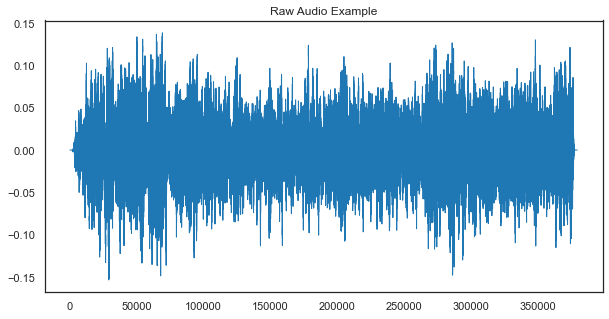

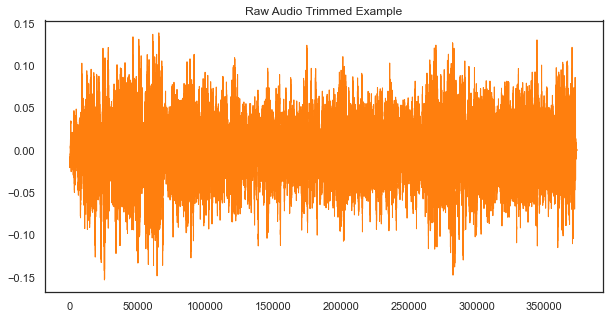

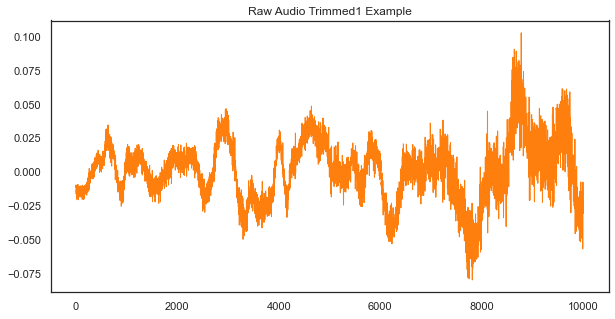

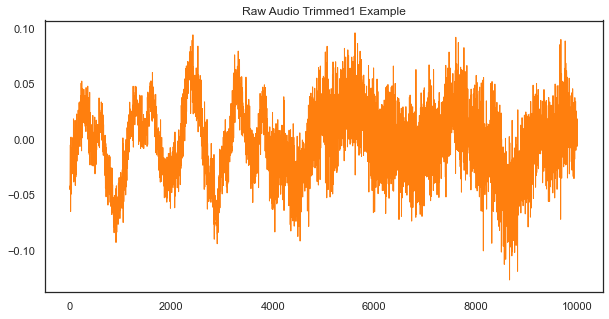

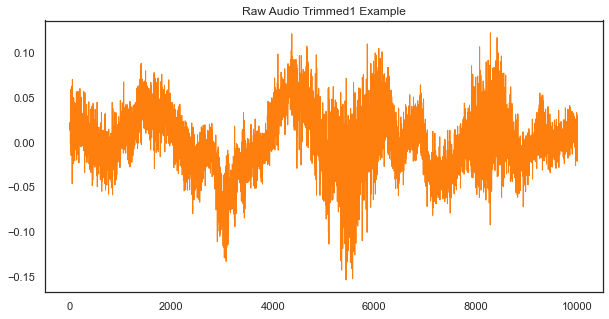

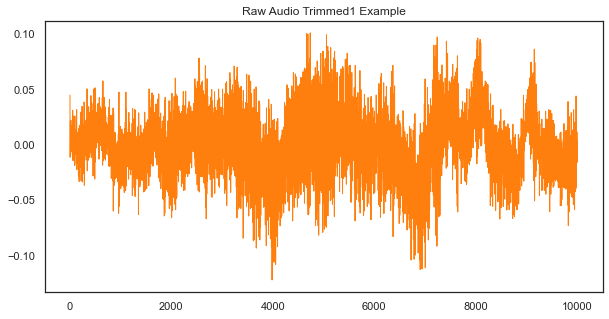

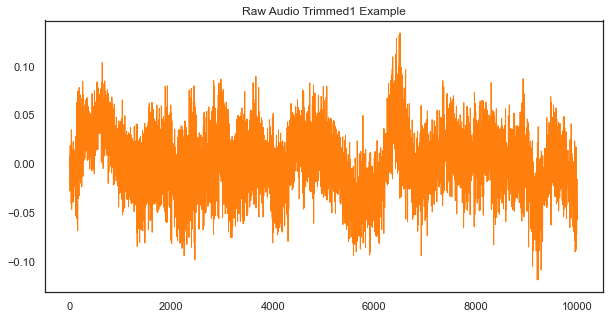

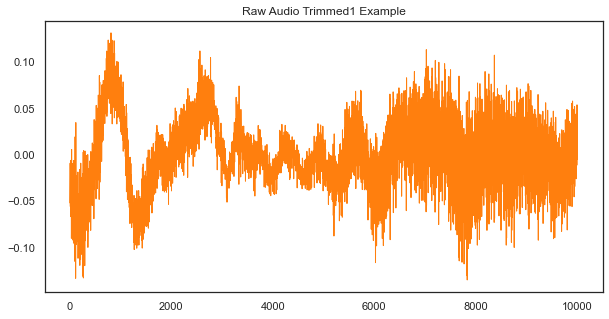

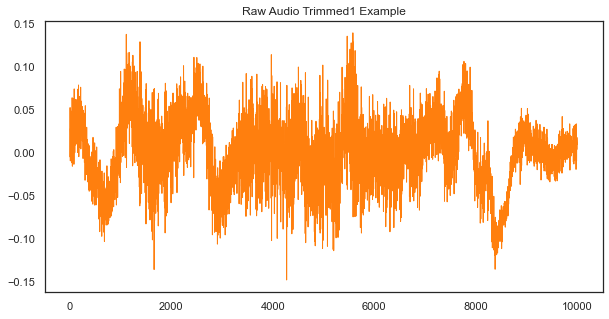

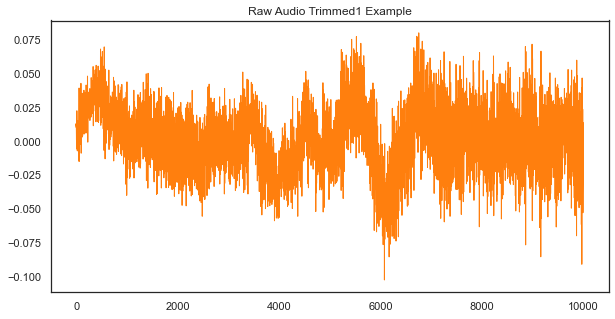

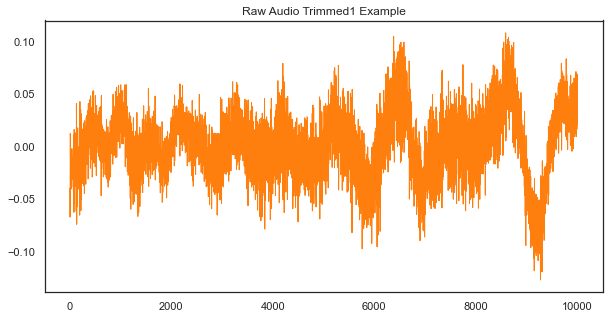

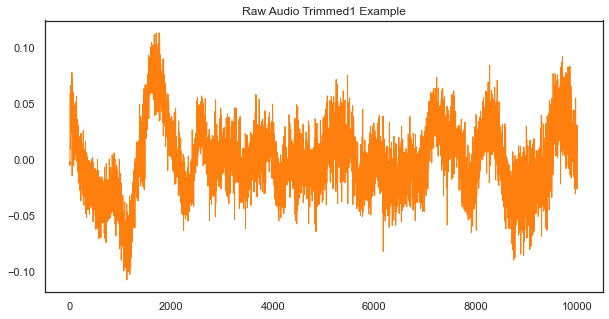

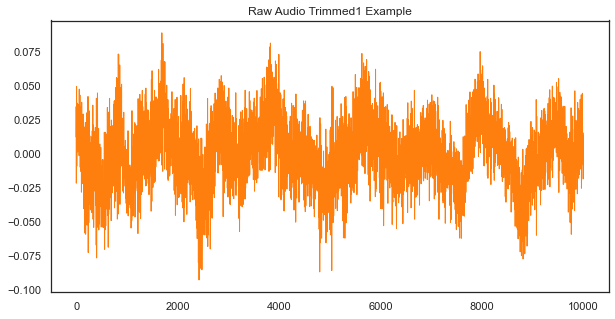

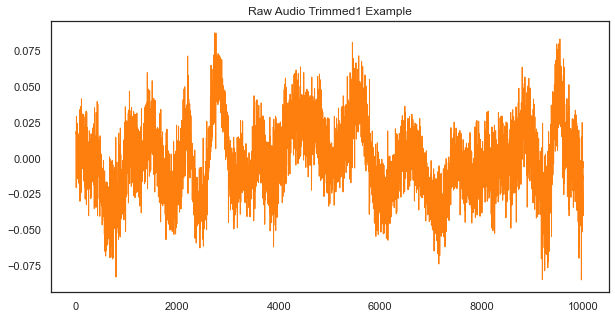

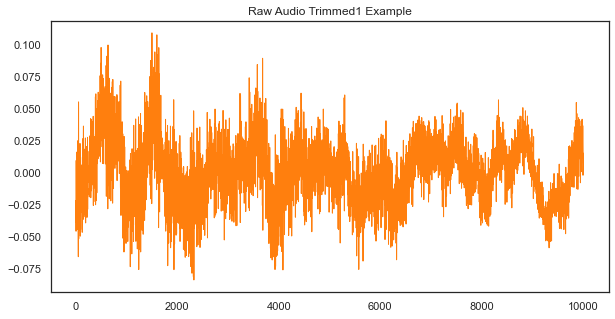

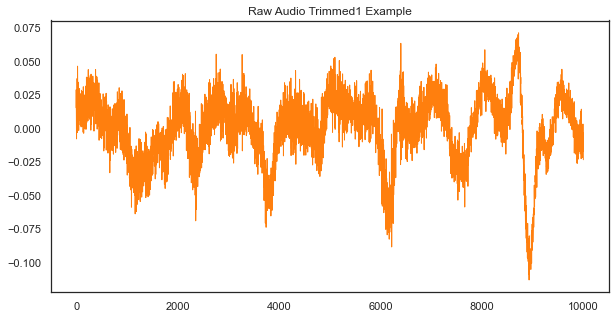

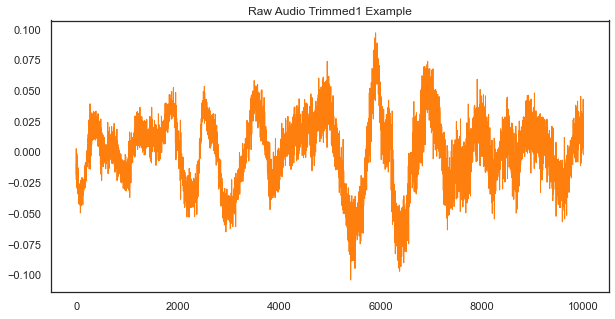

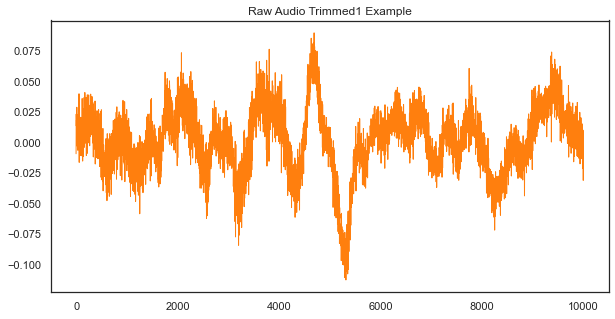

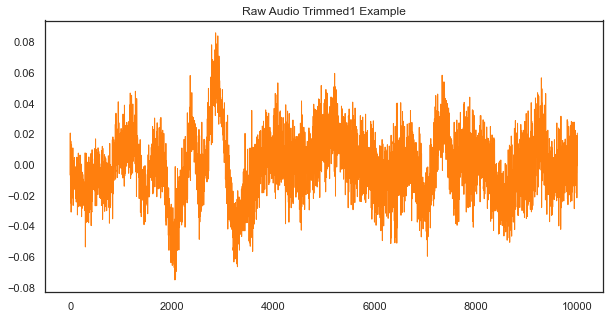

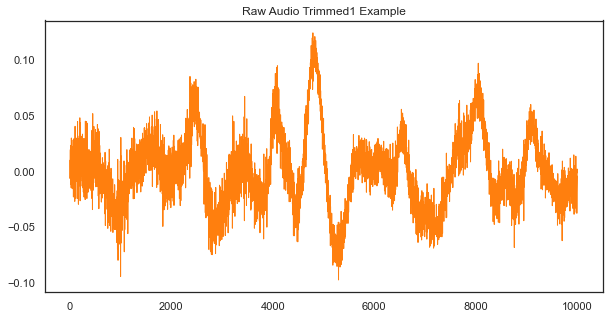

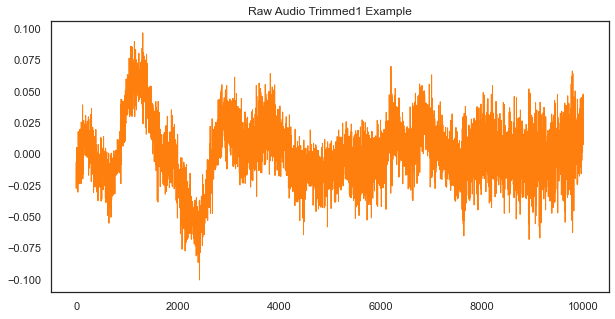

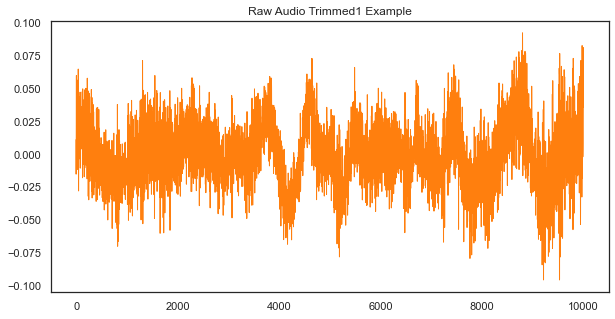

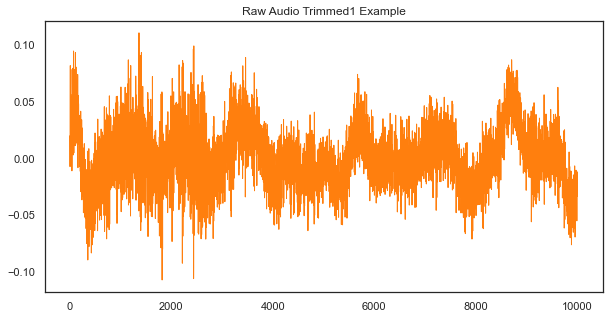

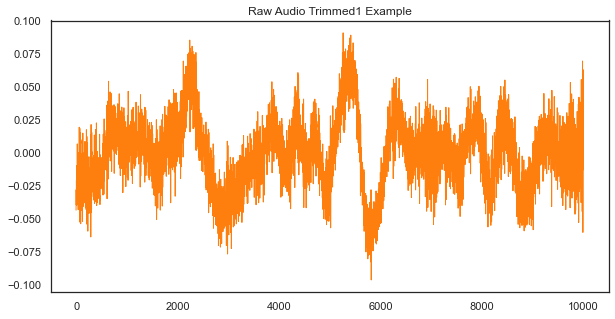

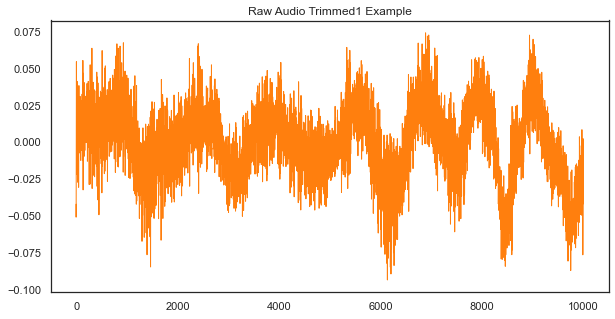

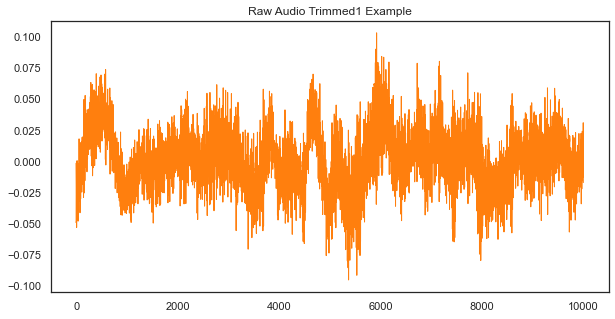

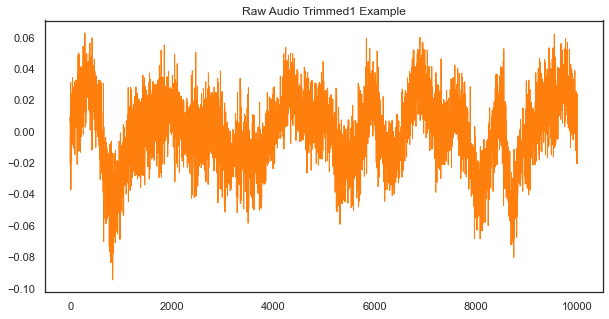

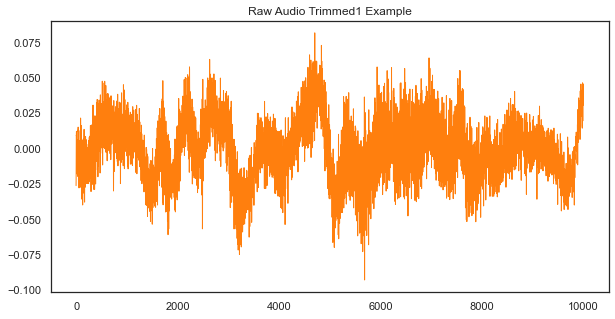

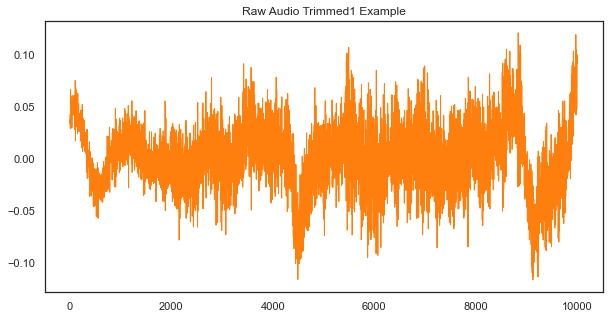

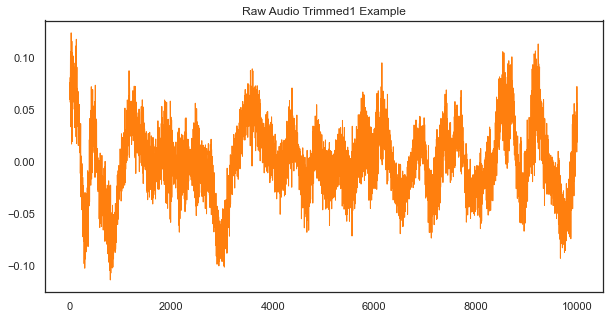

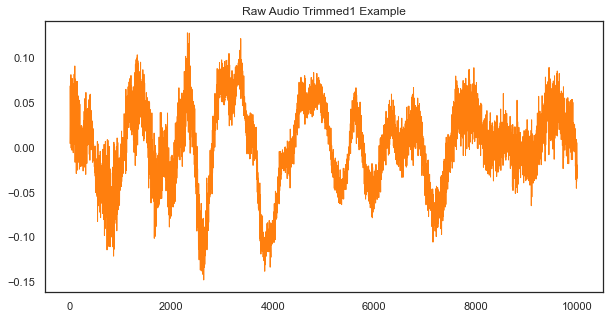

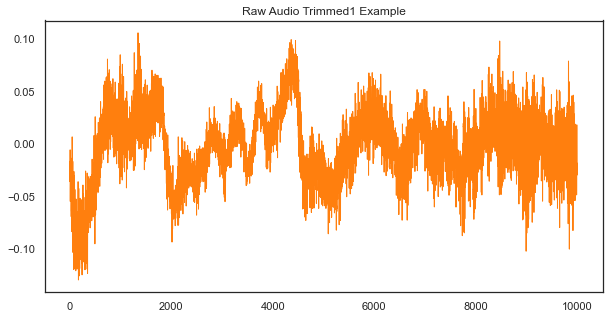

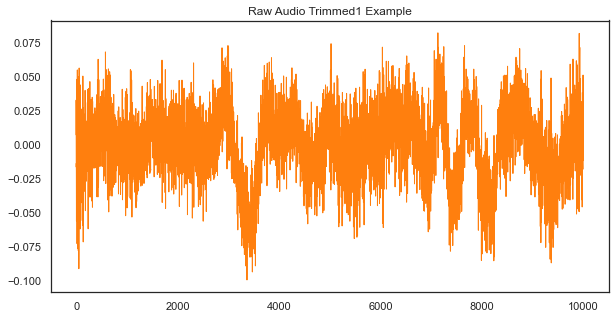

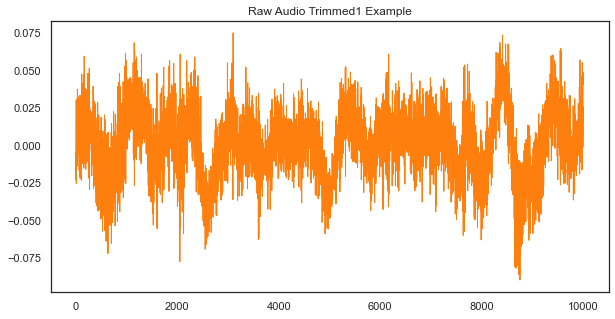

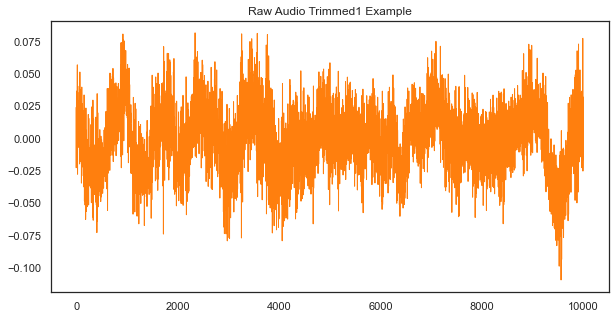

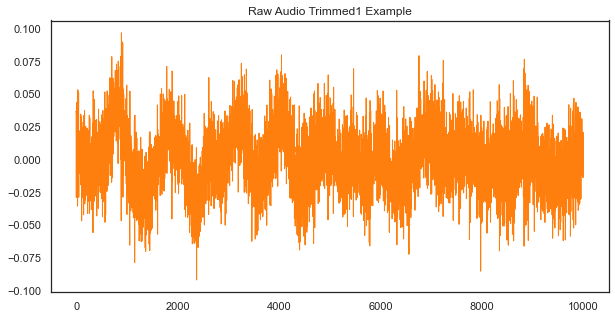

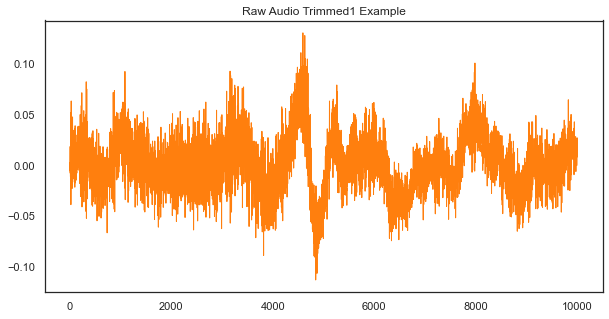

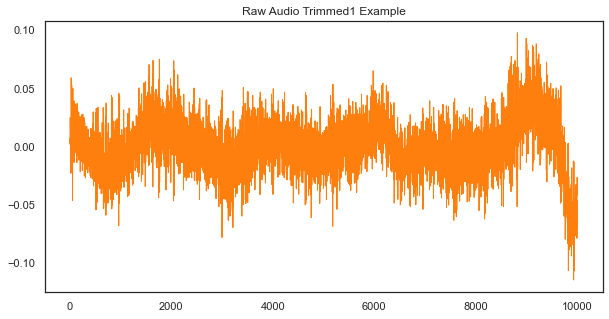

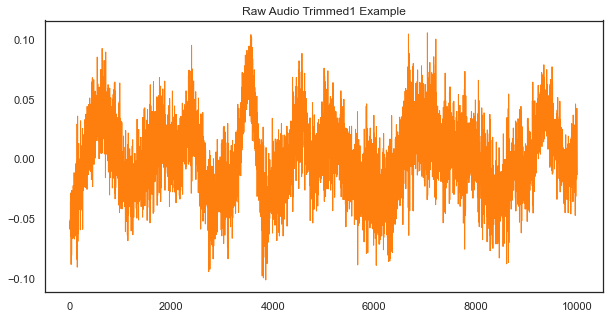

In [13]:

y,sr = librosa.load("training/seagull/seagulls-5863.mp3",sr=22050)
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
ipd.Audio("training/owl/owl-hooting-48028.mp3")### this code trims and front and back and then puts it into chunks
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()


def cut_song(song, step = 10000):
  song_pieces = []
  
  # for i in range(start, end, step):
  #   song_pieces.append(song[i:i+step])
  y_split = librosa.effects.split(song, top_db=20)
  for i in y_split:
    segment = song[i[0]:i[1]]
    for j in range(0, (len(segment)-int(step/2)), step):

      song_pieces.append(segment[j:j+step])
  return song_pieces
  
# y_split = librosa.effects.split(y, top_db=20)
# print("ysplit", y_split)

# for i in y_split:
#   pd.Series(i).plot(figsize=(10, 5),
#                     lw=1,
#                     title='Raw Audio Trimmed Example',
#                   color=color_pal[1])
yCut = cut_song(y_trimmed, 10000)


for i in yCut:
  pd.Series(i).plot(figsize=(10, 5),
                    lw=1,
                    title='Raw Audio Trimmed1 Example',
                  color=color_pal[1])

  plt.show()


from a file list, convert list to nnumpy, and then play audio

In [57]:
import numpy as np
# File_data = np.loadtxt("SAASFreqTest2Values.txt", dtype=float)
f = open("SAASFreqTest2Values.txt", "r")
input = f.readlines()
import ast
 
audio = []
for i in input:
    l = ast.literal_eval(i)
    audio.append(l)
audio = np.array(audio).flatten()
audio.shape
mean = np.mean(audio)
print(mean)
audio = audio-mean


audio = audio/20
print(audio[:10])
import sounddevice as sd
sd.play(audio, 1000,blocking=False)

268.2517361111111
[-0.06258681 -0.21258681 -0.16258681  0.03741319 -0.06258681  0.03741319
  0.08741319  0.13741319  0.03741319 -0.01258681]


In [ ]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()


def cut_song(song, step = 10000):
  start = 0
  end = len(song)
  song_pieces = []
  for i in range(start, end, step):
    song_pieces.append(song[i:i+step])
  return song_pieces


yCut = cut_song(y_trimmed, 20000)


for i in yCut:
  pd.Series(i).plot(figsize=(10, 5),
                    lw=1,
                    title='Raw Audio Trimmed1 Example',
                  color=color_pal[1])

  plt.show()


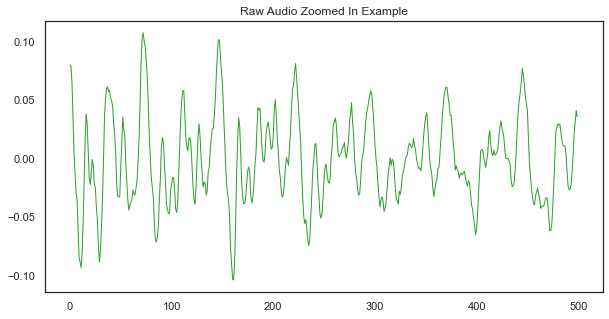

In [7]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

# Spectogram

In [8]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 130)

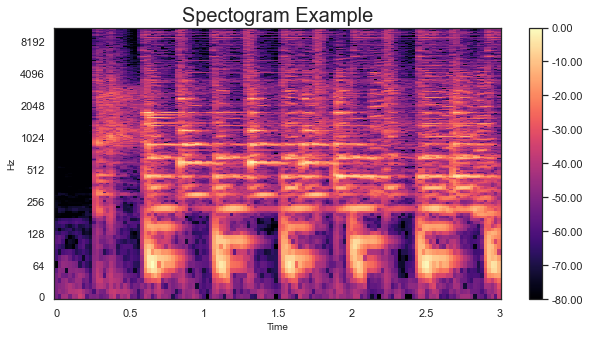

In [9]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Mel Spectogram

In [15]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

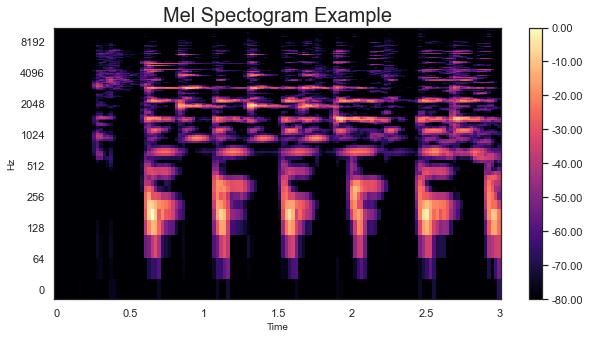

In [14]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

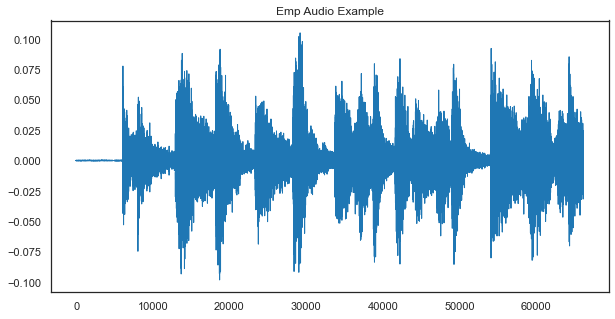

TypeError: resample() takes 1 positional argument but 3 were given

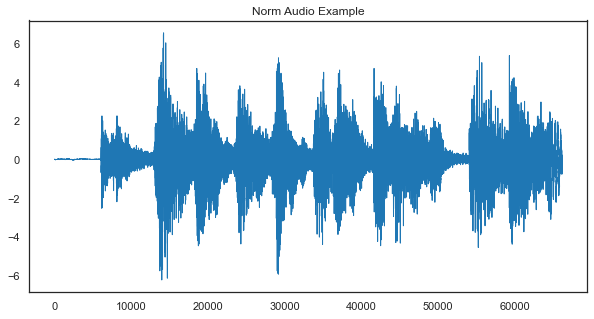

In [15]:
pre_emphasis = 0.97
emphasized_audio = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

pd.Series(emphasized_audio).plot(figsize=(10, 5),
                  lw=1,
                  title='Emp Audio Example',
                 color=color_pal[0])
plt.show()
normalized_audio = (y - np.mean(y)) / np.std(y)
pd.Series(normalized_audio).plot(figsize=(10, 5),
                  lw=1,
                  title='Norm Audio Example',
                 color=color_pal[0])

# y_resampled = librosa.resample(y, sr, 10)

# pd.Series(y_resampled).plot(figsize=(10, 5),
#                   lw=1,
#                   title='resample Audio Example',
#                  color=color_pal[0])

